<a href="https://colab.research.google.com/github/aliakbarbadri/dogs-cats-classification/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Useful links


https://www.tensorflow.org/tutorials/images/classification

https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

https://www.tensorflow.org/tutorials/images/transfer_learning

https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8

# Load and preprocess data

In [0]:
(raw_train, raw_valid, raw_test), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:60%]', 'train[60%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


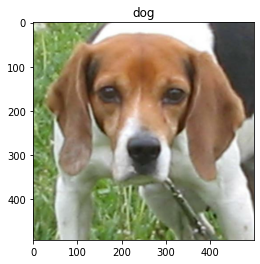

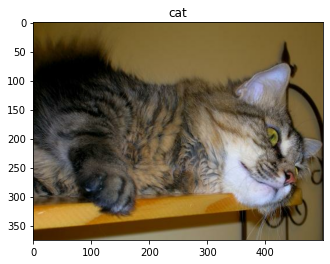

In [4]:
get_label_name = info.features['label'].int2str
"""{
    '0':get_label_name(0),
    '1':get_label_name(1)
    }
"""
print()
for image, label in raw_train.skip(2).take(2):
  print(type(image),type(label))
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [0]:
IMG_SIZE = 160
def resize_image(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [0]:
train = raw_train.map(resize_image)
valid = raw_valid.map(resize_image)
test = raw_test.map(resize_image)

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_batches = valid.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

# Model

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [96]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=IMG_SHAPE, padding="same",activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding="same",activation="relu"))
model.add(Conv2D(64, (3, 3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),padding="same",activation='relu'))
model.add(Conv2D(128, (3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),padding="same",activation='relu'))
model.add(Conv2D(256, (3, 3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.7))

model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.7))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 160, 160, 32)      9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 80, 80, 64)        18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 40, 40, 128)      

In [97]:
history = model.fit(train_batches,epochs=15, validation_data=valid_batches)

Epoch 1/15
437/437 [==============================] - 64s 146ms/step - loss: 0.7233 - accuracy: 0.5388 - val_loss: 0.6757 - val_accuracy: 0.5879
Epoch 2/15
437/437 [==============================] - 63s 145ms/step - loss: 0.5898 - accuracy: 0.6877 - val_loss: 0.5824 - val_accuracy: 0.7094
Epoch 3/15
437/437 [==============================] - 64s 147ms/step - loss: 0.4514 - accuracy: 0.7853 - val_loss: 0.4489 - val_accuracy: 0.7846
Epoch 4/15
437/437 [==============================] - 63s 145ms/step - loss: 0.3790 - accuracy: 0.8320 - val_loss: 1.2696 - val_accuracy: 0.6608
Epoch 5/15
437/437 [==============================] - 63s 144ms/step - loss: 0.3274 - accuracy: 0.8582 - val_loss: 0.3129 - val_accuracy: 0.8600
Epoch 6/15
437/437 [==============================] - 63s 144ms/step - loss: 0.2878 - accuracy: 0.8794 - val_loss: 0.4303 - val_accuracy: 0.8536
Epoch 7/15
437/437 [==============================] - 64s 146ms/step - loss: 0.2541 - accuracy: 0.8996 - val_loss: 0.2997 - val_ac

In [98]:
model.evaluate(test_batches)

73/73 [==============================] - 5s 71ms/step - loss: 0.2396 - accuracy: 0.9080


[0.23961111903190613, 0.9079965353012085]

In [0]:
MODEL_NAME = 'final_cnn2.h5'
model.save(MODEL_NAME)

In [0]:
files.download(MODEL_NAME)

## Graphs

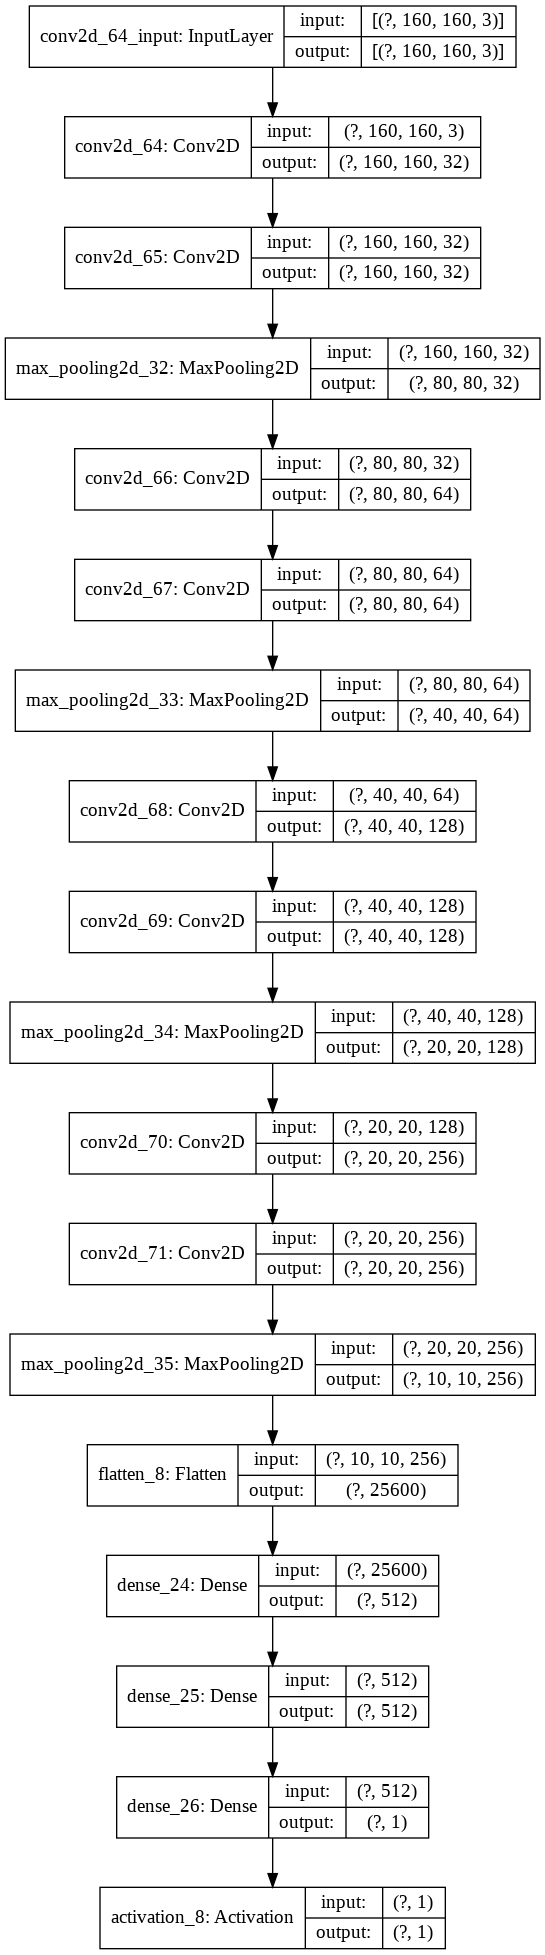

In [101]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

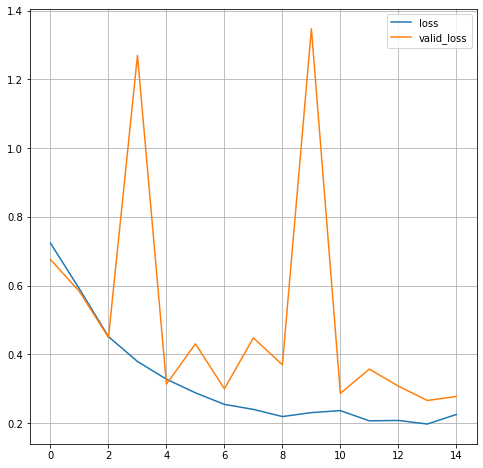

In [99]:
pd.DataFrame({'loss':history.history['loss'],
              'valid_loss':history.history['val_loss'],
              }).plot(figsize=(8, 8))
plt.grid(True)

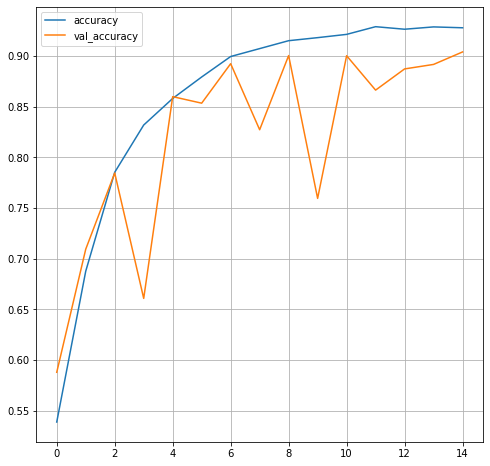

In [100]:
pd.DataFrame({'accuracy':history.history['accuracy'],
              'val_accuracy':history.history['val_accuracy']
              }).plot(figsize=(8, 8))
plt.grid(True)

# Load saved model

In [17]:
!ls

final_cnn.h5  model.png  sample_data


In [18]:
loaded_model = keras.models.load_model("final_cnn2.h5")
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 160, 160, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 160, 160, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 80, 80, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 40, 40, 128)      

In [19]:
loaded_model.evaluate(test_batches)

73/73 [==============================] - 5s 70ms/step - loss: 0.3400 - accuracy: 0.8990


[0.3399501442909241, 0.8989681601524353]

In [47]:
for image, label in raw_test.skip(2).take(2):
  image, label = resize_image(image,label)
  image = np.expand_dims(image, axis=0)
  print(image.shape)

(1, 160, 160, 3)
(1, 160, 160, 3)


In [0]:
def get_image_predict(the_model, image,label):
  image, label = resize_image(image,label)
  image = np.expand_dims(image, axis=0)
  the_label = the_model.predict_classes(image)
  return the_label[0][0]

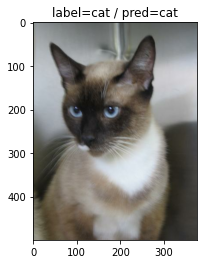

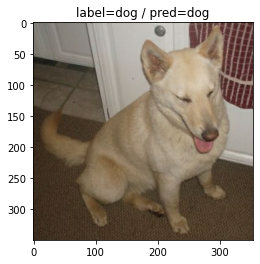

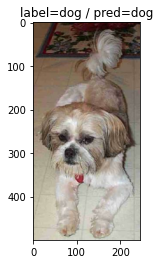

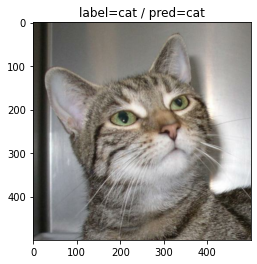

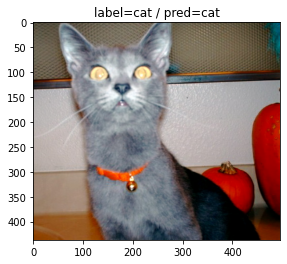

In [71]:
get_label_name = info.features['label'].int2str
for image, label in raw_test.take(5):
  pred_label = get_image_predict(loaded_model,image,label)
  plt.figure()
  plt.imshow(image)
  plt.title("label="+get_label_name(label)+" / pred="+get_label_name(pred_label))